## Caso uso 1: clustering  

In [ ]:

Os dejo un prueba de concepto realizada en base a los casos de uso que tenemos hasta el momento, centrándose en el primer tipo de modelado que se utilizaría, el de clustering.
Para hacerlo se ha simulado un dataset que intenta imitar lo que se podría encontrar en los datos reales, no obstante se trata de datos simulados y debe tomarse con cautela. De hecho, 


In [12]:
# generate certain values
import numpy as np 
from numpy import random
import pandas as pd

cluster_1_clients_size=500
cluster_2_clients_size=500
cluster_3_clients_size=500

# ages 3 clusters
cluster_1_ages_mu, cluster_1_ages_sigma = 25, 5
cluster_1_ages_values = [int(x) for x in random.normal(cluster_1_ages_mu, cluster_1_ages_sigma, cluster_1_clients_size)]

cluster_2_ages_mu, cluster_2_ages_sigma = 40, 10
cluster_2_ages_values = [int(x) for x in random.normal(cluster_2_ages_mu, cluster_2_ages_sigma, cluster_2_clients_size)]

cluster_3_ages_mu, cluster_3_ages_sigma = 60, 5
cluster_3_ages_values = [int(x) for x in random.normal(cluster_3_ages_mu, cluster_3_ages_sigma, cluster_3_clients_size)]

# incomes 3 clusters
cluster_1_incomes_mu, cluster_1_incomes_sigma = 20, 3
cluster_1_incomes_values = [int(x) for x in random.normal(cluster_1_incomes_mu, cluster_1_incomes_sigma, cluster_1_clients_size)]

cluster_2_incomes_mu, cluster_2_incomes_sigma = 40, 5
cluster_2_incomes_values = [int(x) for x in random.normal(cluster_2_incomes_mu, cluster_2_incomes_sigma, cluster_2_clients_size)]

cluster_3_incomes_mu, cluster_3_incomes_sigma = 60, 5
cluster_3_incomes_values = [int(x) for x in random.normal(cluster_3_incomes_mu, cluster_3_incomes_sigma, cluster_3_clients_size)]


clients_df = pd.DataFrame(data={'age': np.append(cluster_1_ages_values, [cluster_2_ages_values, cluster_3_ages_values]), 
                                'gross_income_Ks': np.append(cluster_1_incomes_values, [cluster_2_incomes_values, cluster_3_incomes_values])})
clients_df.tail()

,age,gross_income_Ks
1495,61,60
1496,64,59
1497,57,59
1498,53,66
1499,61,61


### Edades anonimizadas como intervalos y no valores exactos

In [13]:
import seaborn as sns

ax = sns.distplot(cluster_1_ages_values)

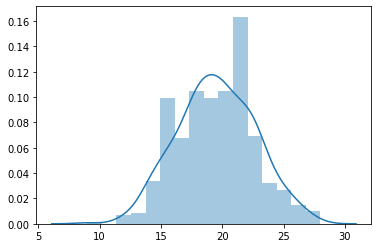

In [14]:
ax = sns.distplot(cluster_1_incomes_values)

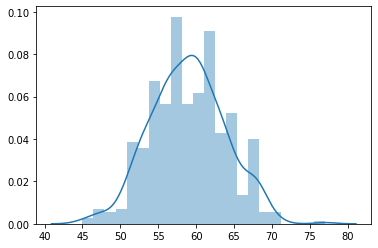

In [15]:
ax = sns.distplot(cluster_3_incomes_values)

In [49]:
import plotly.express as px

fig = px.scatter(clients_df, x=clients_df['age'], y=clients_df['gross_income_Ks'], hover_data=['age', 'gross_income_Ks'])
fig.show()

### Squared Eucliden Distance between 2 points

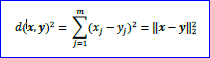

In [19]:
from IPython.display import Image
Image("..\pics\euclidean_distance_from_centroid.PNG", width=1, height=3)

### Optimization algo

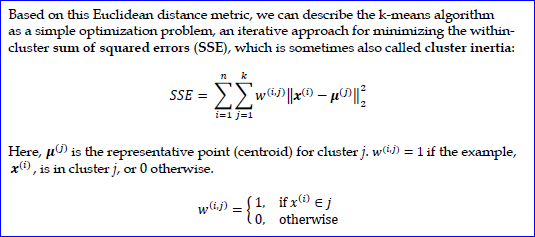

In [20]:
from IPython.display import Image
Image("..\pics\optimization_algo.PNG", width=1, height=3)


In [22]:
from sklearn.cluster import KMeans

distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,
    init='k-means++',
    n_init=10,
    max_iter=300,
    random_state=0)
    km.fit(clients_df)
    distortions.append(km.inertia_)

import plotly.express as px

df_clusters_elbow_method = pd.DataFrame({'clusters': list(range(1, 11)), 'distortions': distortions})
fig = px.scatter(df_clusters_elbow_method, x=df_clusters_elbow_method['clusters'], y=df_clusters_elbow_method['distortions'], hover_data=['clusters', 'distortions'])
fig.show()

In [24]:
km = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(clients_df)

clients_df['cluster_label']=y_km


In [50]:
import plotly.express as px

fig = px.scatter(clients_df, x='age', y='gross_income_Ks', color='cluster_label')
fig.show()

## Extendemos un atributo más

In [51]:
clients_df['rentalibidad'] = pd.Series([np.where(x<40, 20, 60) for x in clients_df['gross_income_Ks'].values])
def define_rentabilidad(x):
    if x<40:
        return random.normal(20, 20, 1)[0].round(2)
    elif (x>40)&(x<60):
        return random.normal(60, 10, 1)[0].round(2)
    else:
        return random.normal(45, 20, 1)[0].round(2) 

clients_df['rentalibidad'] = clients_df['gross_income_Ks'].apply(define_rentabilidad)

import plotly.express as px

fig = px.scatter_3d(clients_df, x='age', y='gross_income_Ks', z='rentalibidad')
fig.show()

# Standarizamos valores

In [37]:
# Standardize values
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
clients_final_scaled = scaler.fit_transform(clients_df)
clients_final_df_scaled = pd.DataFrame(columns=clients_df.columns, data=clients_final_scaled)

In [52]:
import plotly.express as px

fig = px.scatter_3d(clients_final_df_scaled, x='age', y='gross_income_Ks', z='rentalibidad')
fig.show()

## ELBOW METHOD PARA ENCONTRAR MEJOR NÚMERO DE CLUSTERS 
### Habría que estandarizar los datos si no estuvieran en la misma escala

In [41]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,
    init='k-means++',
    n_init=10,
    max_iter=300,
    random_state=0)
    km.fit(clients_final_df_scaled)
    distortions.append(km.inertia_)

import plotly.express as px

df_clusters_elbow_method = pd.DataFrame({'clusters': list(range(1, 11)), 'distortions': distortions})
fig = px.scatter(df_clusters_elbow_method, x=df_clusters_elbow_method['clusters'], y=df_clusters_elbow_method['distortions'], hover_data=['clusters', 'distortions'])
fig.show()

In [21]:
#Clusters masks
'''
clients_cluster_1_mask = y_km == 0
clients_cluster_2_mask = y_km == 1
clients_cluster_3_mask = y_km == 2
'''

### APLICAMOS k=2 Y k=3 CLUSTERS

In [42]:
from sklearn.cluster import KMeans

cluster_belonging={}
for cluster_i in range(2, 4):
    km = KMeans(n_clusters=cluster_i, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
    y_km = km.fit_predict(clients_df)
    cluster_name = str(cluster_i)+'_clusters' 
    cluster_belonging[cluster_name] = y_km

cluster_belonging


{'2_clusters': array([1, 1, 1, ..., 0, 0, 0]),
 '3_clusters': array([0, 1, 1, ..., 2, 2, 2])}

### Añadimos al dataset una columna de pertenencia a cluster

In [46]:
clients_final_df_scaled['2_clusters'] = pd.Series(cluster_belonging['2_clusters'])
clients_final_df_scaled['3_clusters'] = pd.Series(cluster_belonging['3_clusters'])


In [53]:
import plotly.express as px

fig = px.scatter_3d(clients_final_df_scaled, x='age', y='gross_income_Ks', z='rentalibidad', color='2_clusters')
fig.show()

In [54]:
import plotly.express as px

fig = px.scatter_3d(clients_final_df_scaled, x='age', y='gross_income_Ks', z='rentalibidad', color='3_clusters')
fig.show()

### Una vez construidos los clusters con 2 y 3 centroides, podemos ver qué valores típicos encontramos en algunas variables de interés en cada cluster:
* qué edad media (y dispersión) tienen los clientes de alta rentabilidad?
* qué salario bruto medio (y dispersión) tienen los clientes de alta rentabilidad?
* ...

In [ ]:
clientes_alta_rentabilidad_mask = clients_df['rentalibidad']==65

age_clientes_alta_rentabilidad = clients_df[clientes_alta_rentabilidad_mask]


## Ejemplo insight 5 caso de uso 2

In [235]:
import pandas as pd 

payments_16_17 = pd.read_csv(r'..\data\2016-2017 Payment Details.csv', thousands=',')
payments_17_18 = pd.read_csv(r'..\data\2017-2018 Payment Details.csv', thousands=',')
payments_18_19 = pd.read_csv(r'..\data\2018-2019 Payment Details.csv', thousands=',')
payments_19_20 = pd.read_csv(r'..\data\2019-2020 Payment Details.csv', thousands=',')

payments_df = pd.concat([payments_16_17, payments_17_18, payments_18_19, payments_19_20])

In [236]:
payments_df.tail()

,Category,Month,Value of Internet Payments Made,Number of Internet Payments Made,Value of IVR Payments Made,Number of IVR Payments Made,Value of Browser Payments Made,Number of Browser Payments Made
343,Commercial/Market Rents,Mar-20,37127.28,57.0,63882.28,139.0,-84.19,1.0
344,Council Tax,Mar-20,1008071.82,6434.0,813980.22,5651.0,237715.77,1927.0
345,Business Rates,Mar-20,43234.54,36.0,38698.21,69.0,48984.78,47.0
346,Housing Benefits Overpayments,Mar-20,11107.70,230.0,15623.71,364.0,11536.22,145.0
347,Parking Fines,Mar-20,144694.00,3947.0,97554.41,2603.0,6713.00,295.0


## Definiciones de atributos:
* grado_digital (sintetizado): porcentaje de compras realizadas en medios digitales (internet y/o browser), con peso específico de proximidad temporal (dando más peso a las recientes) 
* efectividad digital (sintetizado): valor medio mensual de los pagos realizados por internet y browser
* volumen_medio_compras_mensuales (disponible de origen) 
* número medio de canales usados al mes  

Nos quedamos a priori con el primero, tercero y cuarto (el segundo tendrá alta correlación con el tercero)

In [237]:

payments_weighted_over_time = [(n/len(payments_16_17)) for n in range(len(payments_16_17))]

In [238]:
payments_df.describe()

,Value of Internet Payments Made,Number of Internet Payments Made,Value of IVR Payments Made,Number of IVR Payments Made,Value of Browser Payments Made,Number of Browser Payments Made
count,6.450000e+02,645.000000,3.690000e+02,369.000000,9.320000e+02,932.000000
mean,1.746626e+05,1573.010853,2.677882e+05,2158.097561,8.758303e+04,635.467811
std,3.081251e+05,2634.949337,3.078605e+05,2705.320154,1.925523e+05,1158.768673
min,1.570000e+00,1.000000,1.200000e+02,1.000000,-4.356000e+03,0.000000
25%,1.214199e+04,71.000000,7.807983e+04,218.000000,9.150200e+02,6.000000
50%,3.807608e+04,281.000000,1.258548e+05,715.000000,1.399303e+04,223.000000
75%,1.448080e+05,1230.000000,5.081478e+05,3452.000000,7.492907e+04,584.000000
max,1.637125e+06,10763.000000,1.510978e+06,10004.000000,1.260586e+06,5950.000000


## Sustituimos valores ausentes por 0

In [239]:
for numeric_attr in payments_df.columns[2:]:
    payments_df[numeric_attr]=payments_df[numeric_attr].astype('float')

In [240]:
client_df=client_df[client_df.columns[2:]].applymap(lambda x: 0 if math.isnan(float(x)) else x)

### Generamos los atributos sintéticos que necesitamos

In [241]:
# new attributes:
payments_df['weighted_internet_payments']=pd.Series()
payments_df['weighted_phone_payments']=pd.Series()
payments_df['weighted_browser_payments']=pd.Series()
payments_df['number_internet_payments']=pd.Series()
payments_df['number_phone_payments']=pd.Series()
payments_df['number_browser_payments']=pd.Series()


In [242]:
'''
client_mask = payments_df['Category']=='Planning'
client_df = payments_df[client_mask]
# weighted internet payments
weighted_internet_payments_over_time = [(n/len(client_df)) for n in range(len(client_df))]

payments_df[client_mask]['weighted_internet_payments'] = np.multiply(weighted_internet_payments_over_time, client_df['Value of Internet Payments Made'], where=np.isnan==False)
'''

"\nclient_mask = payments_df['Category']=='Planning'\nclient_df = payments_df[client_mask]\n# weighted internet payments\nweighted_internet_payments_over_time = [(n/len(client_df)) for n in range(len(client_df))]\n\npayments_df[client_mask]['weighted_internet_payments'] = np.multiply(weighted_internet_payments_over_time, client_df['Value of Internet Payments Made'], where=np.isnan==False)\n"

In [243]:
clients=payments_df['Category'].unique()

payments_clients_df = pd.DataFrame(columns=['Category', 'Month', 'Value of Internet Payments Made',
       'Number of Internet Payments Made', 'Value of IVR Payments Made',
       'Number of IVR Payments Made', 'Value of Browser Payments Made',
       'Number of Browser Payments Made', 'weighted_internet_payments',
       'weighted_phone_payments', 'weighted_browser_payments', 'number_internet_payments',
       'number_phone_payments', 'number_browser_payments', 'channels_used'])

for client in clients:
    payments_this_client_df = pd.DataFrame(columns=['Category', 'Month', 'Value of Internet Payments Made',
       'Number of Internet Payments Made', 'Value of IVR Payments Made',
       'Number of IVR Payments Made', 'Value of Browser Payments Made',
       'Number of Browser Payments Made', 'weighted_internet_payments',
       'weighted_phone_payments', 'weighted_browser_payments', 'number_internet_payments',
       'number_phone_payments', 'number_browser_payments', 'channels_used'])
    # warning: asumimos registros ordenados por tiempo; para esta POC lo dejamos así sin asegurarlo
    client_mask = payments_df['Category']==client
    payments_this_client_df = payments_df[client_mask]
    # time weights
    weights_over_time = [(n/len(payments_this_client_df)) for n in range(len(payments_this_client_df))]
    # weighted internet payments
    payments_this_client_df['weighted_internet_payments'] = np.multiply(weights_over_time, payments_this_client_df['Value of Internet Payments Made'])
    payments_this_client_df['number_internet_payments'] = np.multiply(weights_over_time, payments_this_client_df['Number of Internet Payments Made'])
    # weighted phone payments
    payments_this_client_df['weighted_phone_payments'] = np.multiply(weights_over_time, payments_this_client_df['Value of IVR Payments Made'])
    payments_this_client_df['number_phone_payments'] = np.multiply(weights_over_time, payments_this_client_df['Number of IVR Payments Made'])
    # weighted browser payments
    payments_this_client_df['weighted_browser_payments'] = np.multiply(weights_over_time, payments_this_client_df['Value of Browser Payments Made'])
    payments_this_client_df['number_browser_payments'] = np.multiply(weights_over_time, payments_this_client_df['Number of Browser Payments Made'])

    payments_clients_df = pd.concat([payments_clients_df, payments_this_client_df])

payments_clients_df.tail()


,Category,Month,Number of Browser Payments Made,Number of IVR Payments Made,Number of Internet Payments Made,Value of Browser Payments Made,Value of IVR Payments Made,Value of Internet Payments Made,channels_used,number_browser_payments,number_internet_payments,number_phone_payments,weighted_browser_payments,weighted_internet_payments,weighted_phone_payments
223,Leedswatch,Nov-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
252,Leedswatch,Dec-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
281,Leedswatch,Jan-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
310,Leedswatch,Feb-20,1.0,NaN,NaN,30.0,NaN,NaN,NaN,0.866667,NaN,NaN,26.0,NaN,NaN
339,Leedswatch,Mar-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [245]:
payments_clients_df[payments_clients_df.columns[2:]]=payments_clients_df[payments_clients_df.columns[2:]].applymap(lambda x: 0 if math.isnan(float(x)) else x)
payments_clients_df.iloc[:5]

,Category,Month,Number of Browser Payments Made,Number of IVR Payments Made,Number of Internet Payments Made,Value of Browser Payments Made,Value of IVR Payments Made,Value of Internet Payments Made,channels_used,number_browser_payments,number_internet_payments,number_phone_payments,weighted_browser_payments,weighted_internet_payments,weighted_phone_payments
0,Leeds Card,Apr-16,0.0,0.0,0.0,0.00,0.0,0.0,0,0.000000,0.0,0.0,0.000000,0.0,0.0
27,Leeds Card,May-16,0.0,0.0,0.0,0.00,0.0,0.0,0,0.000000,0.0,0.0,0.000000,0.0,0.0
54,Leeds Card,Jun-16,2.0,0.0,0.0,-28.25,0.0,0.0,0,0.083333,0.0,0.0,-1.177083,0.0,0.0
81,Leeds Card,Jul-16,0.0,0.0,0.0,0.00,0.0,0.0,0,0.000000,0.0,0.0,0.000000,0.0,0.0
108,Leeds Card,Aug-16,0.0,0.0,0.0,0.00,0.0,0.0,0,0.000000,0.0,0.0,0.000000,0.0,0.0


Por cada cliente:
* grado_digital (sintetizado): porcentaje de compras realizadas en medios digitales (internet y/o browser), con el peso específico de proximidad temporal ta aplicado en los atributos: weighted_internet_payments, weighted_phone_payments y weighted_browser_payments
* volumen_medio_compras_mensuales (disponible de origen), con el peso específico de proximidad temporal
* número medio de canales usados al mes, con el peso específico de proximidad temporal

In [246]:
# número medio de canales usados:
def count_channels_used(i):
    channels_used = 0
    channel_payments_columns = ['Number of Internet Payments Made', 'Number of IVR Payments Made', 'Number of Browser Payments Made']
    for channel in channel_payments_columns:
        if payments_clients_df.iloc[i][channel]>0:
            channels_used += 1
    return channels_used
# Canales usados
payments_clients_df['canales_usados'] = pd.Series(payments_clients_df.index).apply(count_channels_used)

In [247]:
# Grado digital:
payments_clients_df['grado_digital'] = payments_clients_df['weighted_internet_payments']+payments_clients_df['weighted_browser_payments']
payments_clients_df.iloc[80:85]

,Category,Month,Number of Browser Payments Made,Number of IVR Payments Made,Number of Internet Payments Made,Value of Browser Payments Made,Value of IVR Payments Made,Value of Internet Payments Made,channels_used,number_browser_payments,number_internet_payments,number_phone_payments,weighted_browser_payments,weighted_internet_payments,weighted_phone_payments,canales_usados,grado_digital
225,Leodis,Dec-18,1.0,0.0,13.0,-14.0,0.0,206.56,0,0.666667,8.666667,0.0,-9.333333,137.706667,0.0,2,128.373333
253,Leodis,Jan-19,0.0,0.0,17.0,0.0,0.0,385.64,0,0.000000,11.687500,0.0,0.000000,265.127500,0.0,0,265.127500
282,Leodis,Feb-19,1.0,0.0,24.0,-11.0,0.0,632.27,0,0.708333,17.000000,0.0,-7.791667,447.857917,0.0,2,440.066250
311,Leodis,Mar-19,0.0,0.0,9.0,0.0,0.0,257.09,0,0.000000,6.562500,0.0,0.000000,187.461458,0.0,1,187.461458
1,Leodis,Apr-19,0.0,0.0,15.0,0.0,0.0,279.08,0,0.000000,11.250000,0.0,0.000000,209.310000,0.0,0,209.310000


In [248]:
# volumen_compras
payments_clients_df['volumen_compras']=payments_clients_df['number_browser_payments']+payments_clients_df['number_internet_payments']+payments_clients_df['number_phone_payments']
payments_clients_df.iloc[80:90]

,Category,Month,Number of Browser Payments Made,Number of IVR Payments Made,Number of Internet Payments Made,Value of Browser Payments Made,Value of IVR Payments Made,Value of Internet Payments Made,channels_used,number_browser_payments,number_internet_payments,number_phone_payments,weighted_browser_payments,weighted_internet_payments,weighted_phone_payments,canales_usados,grado_digital,volumen_compras
225,Leodis,Dec-18,1.0,0.0,13.0,-14.0,0.0,206.56,0,0.666667,8.666667,0.0,-9.333333,137.706667,0.0,2,128.373333,9.333333
253,Leodis,Jan-19,0.0,0.0,17.0,0.0,0.0,385.64,0,0.000000,11.687500,0.0,0.000000,265.127500,0.0,0,265.127500,11.687500
282,Leodis,Feb-19,1.0,0.0,24.0,-11.0,0.0,632.27,0,0.708333,17.000000,0.0,-7.791667,447.857917,0.0,2,440.066250,17.708333
311,Leodis,Mar-19,0.0,0.0,9.0,0.0,0.0,257.09,0,0.000000,6.562500,0.0,0.000000,187.461458,0.0,1,187.461458,6.562500
1,Leodis,Apr-19,0.0,0.0,15.0,0.0,0.0,279.08,0,0.000000,11.250000,0.0,0.000000,209.310000,0.0,0,209.310000,11.250000
30,Leodis,May-19,0.0,0.0,10.0,0.0,0.0,238.09,0,0.000000,7.708333,0.0,0.000000,183.527708,0.0,2,183.527708,7.708333
59,Leodis,Jun-19,0.0,0.0,17.0,0.0,0.0,357.60,0,0.000000,13.458333,0.0,0.000000,283.100000,0.0,1,283.100000,13.458333
88,Leodis,Jul-19,0.0,0.0,16.0,0.0,0.0,307.57,0,0.000000,13.000000,0.0,0.000000,249.900625,0.0,1,249.900625,13.000000
117,Leodis,Aug-19,0.0,0.0,13.0,0.0,0.0,342.12,0,0.000000,10.833333,0.0,0.000000,285.100000,0.0,2,285.100000,10.833333
146,Leodis,Sep-19,0.0,0.0,14.0,0.0,0.0,340.15,0,0.000000,11.958333,0.0,0.000000,290.544792,0.0,1,290.544792,11.958333


In [253]:
monthly_mean_weighted_digital_payments=payments_clients_df[['Category', 'grado_digital']].groupby(['Category']).mean()
monthly_mean_weighted_payments_number=payments_clients_df[['Category', 'volumen_compras']].groupby(['Category']).mean()
monthly_mean_channels_used_number=payments_clients_df[['Category', 'canales_usados']].groupby(['Category']).mean()

In [260]:
clients_final_df = pd.DataFrame({'client': monthly_mean_channels_used_number.index, 'grado_digital_medio': monthly_mean_weighted_digital_payments['grado_digital'].values, 'volumen_compras_medio': monthly_mean_weighted_payments_number['volumen_compras'].values, 'canales_usados_medio': monthly_mean_channels_used_number['canales_usados'].values})
clients_final_df

,client,grado_digital_medio,volumen_compras_medio,canales_usados_medio
0,Asset Regeneration,17.482993,0.731293,1.095238
1,Blue Badge,3677.300751,374.896701,1.166667
2,Business Rates,59581.849123,131.945747,1.145833
3,Children's Services,0.000000,0.000000,1.437500
4,City & Environmental Services,40994.638368,832.365885,1.125000
5,Commercial/Market Rents,20354.303637,164.366753,1.208333
6,Council Tax,651674.844280,9555.372830,1.125000
7,EAS,2799.241536,2.746962,1.020833
8,Electoral & Local Land Charges,10.306988,0.315972,1.250000
9,Entertainment Licences,17051.201172,179.428385,1.083333


In [273]:
# Standardize values
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
columns_to_scale = ['grado_digital_medio', 'volumen_compras_medio', 'canales_usados_medio']
clients_final_df['grado_digital_std'] = scaler.fit_transform(clients_final_df['grado_digital_medio'].values.reshape(-1, 1))
clients_final_df['compras_medio_std'] = scaler.fit_transform(clients_final_df['volumen_compras_medio'].values.reshape(-1, 1))
clients_final_df['canales_usados_std'] = scaler.fit_transform(clients_final_df['canales_usados_medio'].values.reshape(-1, 1))

## Plot nube puntos

In [276]:
clients_final_df

,client,grado_digital_medio,volumen_compras_medio,canales_usados_medio,grado_digital_std,compras_medio_std,canales_usados_std
0,Asset Regeneration,17.482993,0.731293,1.095238,-0.371882,-0.390596,-0.076727
1,Blue Badge,3677.300751,374.896701,1.166667,-0.351830,-0.211888,0.227571
2,Business Rates,59581.849123,131.945747,1.145833,-0.045540,-0.327925,0.138817
3,Children's Services,0.000000,0.000000,1.437500,-0.371978,-0.390945,1.381368
4,City & Environmental Services,40994.638368,832.365885,1.125000,-0.147376,0.006606,0.050064
5,Commercial/Market Rents,20354.303637,164.366753,1.208333,-0.260460,-0.312441,0.405078
6,Council Tax,651674.844280,9555.372830,1.125000,3.198428,4.172852,0.050064
7,EAS,2799.241536,2.746962,1.020833,-0.356641,-0.389633,-0.393705
8,Electoral & Local Land Charges,10.306988,0.315972,1.250000,-0.371921,-0.390794,0.582585
9,Entertainment Licences,17051.201172,179.428385,1.083333,-0.278557,-0.305247,-0.127444


In [275]:
import plotly.express as px

fig = px.scatter_3d(clients_final_df, x='grado_digital_std', y='compras_medio_std', z='canales_usados_std')
fig.show()


In [279]:
columns_to_cluster = ['grado_digital_std', 'compras_medio_std', 'canales_usados_std']
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,
    init='k-means++',
    n_init=10,
    max_iter=300,
    random_state=0)
    km.fit(clients_final_df[columns_to_cluster])
    distortions.append(km.inertia_)

import plotly.express as px

df_clusters_elbow_method = pd.DataFrame({'clusters': list(range(1, 11)), 'distortions': distortions})
fig = px.scatter(df_clusters_elbow_method, x=df_clusters_elbow_method['clusters'], y=df_clusters_elbow_method['distortions'], hover_data=['clusters', 'distortions'])
fig.show()

In [280]:
km = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(clients_final_df[columns_to_cluster])

clients_final_df['3_clusters'] = pd.Series(y_km)

import plotly.express as px

fig = px.scatter_3d(clients_final_df, x='grado_digital_std', y='compras_medio_std', z='canales_usados_std', color='3_clusters')
fig.show()